[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/4/W4a.ipynb)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import pickle

#We first generate some $\chi^2$ random variates.

## $\chi^2$ generation

In [2]:
chsq = stats.chi2(10)

In [3]:
samples = chsq.rvs(10000)

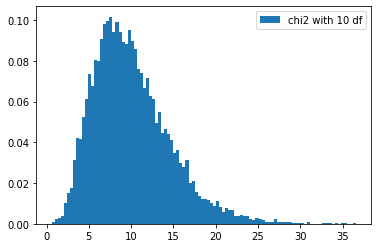

In [6]:
plt.hist(samples, density  = True, label = "chi2 with 10 df", bins = 100)
plt.legend()
plt.show()

In [8]:
X = np.random.randn(10000, 10)
X.shape

(10000, 10)

In [11]:
np.square(X) == X*X  ####  X*X is not matrix multiplication its is compt. wise mult.

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [13]:
chisq_fake = np.sum(X*X, axis = 1)

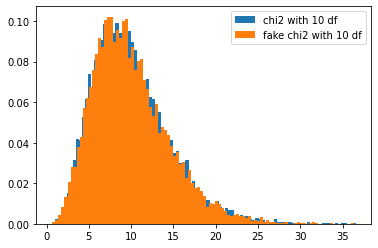

In [14]:
plt.hist(samples, density  = True, label = "chi2 with 10 df", bins = 100)
plt.hist(chisq_fake, density  = True, label = "fake chi2 with 10 df", bins = 100)
plt.legend()
plt.show()  
####These dudes, they just overlap.  If you like to further convince your self do some KS test.

# Mixtures
# Say we are mixing $N(1,1)$ and $N(-1, 1)$ equal amount.

In [17]:
np.random.choice([0,1]) ### this is the way that we filp a coin (fair)

0

In [27]:
def sample_from_mixture(n:int)->np.ndarray:
  L = []
  for i in range(n):
    flip = np.random.choice([0,1])
    if flip == 1:
      L.append(np.random.randn() + 2)
    else:
      L.append(np.random.randn() - 2)
  return np.array(L)

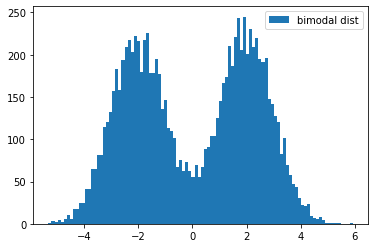

In [28]:
sample = sample_from_mixture(10000)
plt.hist(sample, label = "bimodal dist", bins = 100)
plt.legend()
plt.show()

In [31]:
A = np.random.choice([0,1], p = [0.3, 0.7], size = 1000)

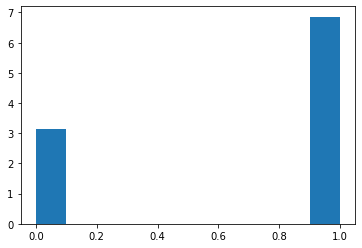

In [36]:
plt.hist(A, density = True);

In [37]:
def sample_from_weighted_mixture(n:int, p)->np.ndarray:
  L = []
  for i in range(n):
    flip = np.random.choice([0,1], p = p)
    if flip == 1:
      L.append(np.random.randn() + 2)
    else:
      L.append(np.random.randn() - 2)
  return np.array(L)

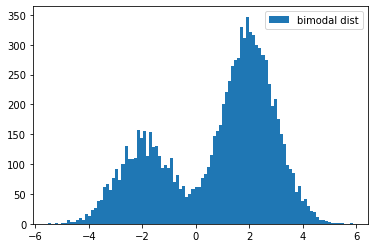

In [38]:
sample = sample_from_weighted_mixture(10000, p = [0.3, 0.7])
plt.hist(sample, label = "bimodal dist", bins = 100)
plt.legend()
plt.show()

# Multidimensional Normal Distribution

In [59]:
###  What do we need???
### A mean vector, and symmetric positive definite matrix.
mu = np.random.rand(2) ### picking a random vector
x = np.random.randn(2,2)
cov = x @ x.T

In [60]:
RV = stats.multivariate_normal(mean = mu, cov = cov)

In [61]:
sample = RV.rvs(1000)

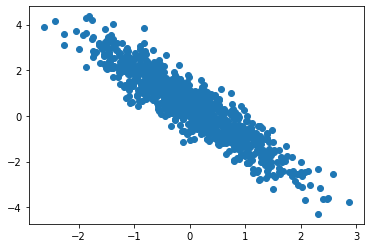

In [62]:
plt.scatter(sample[:, 0], sample[:, 1])

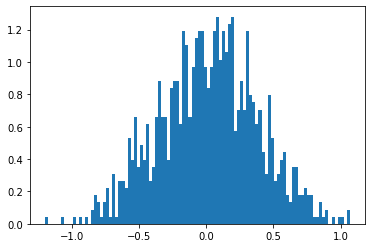

In [57]:
plt.hist(sample[:, 1], density = True, bins = 100); ### cross sections

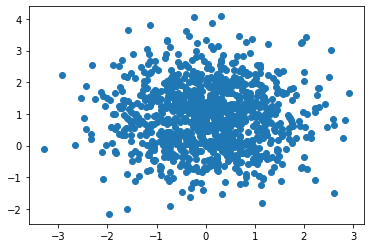

In [58]:
###  What do we need???
### A mean vector, and symmetric positive definite matrix.
mu = np.random.rand(2) ### picking a random vector
cov = np.ones(2)
RV = stats.multivariate_normal(mean = mu, cov = cov)
sample = RV.rvs(1000)
plt.scatter(sample[:, 0], sample[:, 1])

# How to draw samples from $N_d(\mu, \Sigma)$?

In [89]:
mu = np.random.randn(2)
x = np.random.randn(2,2)
sigma = x @ x.T

In [83]:
### We would like to draw samples from N_2(mu, sigma)

In [90]:
Z = np.random.randn(1000, 2) ###This is sample from normal distribution

In [91]:
H = np.linalg.cholesky(sigma)
Q = H.T

In [88]:
Q

array([[ 1.73092611, -0.18515543],
       [ 0.        ,  1.29024228]])

In [92]:
Q.T @ Q  ### this is matrix multiplication

array([[0.94604724, 0.90635605],
       [0.90635605, 3.22185266]])

In [93]:
sample = Z @ Q + mu  ##I used here broadcasting

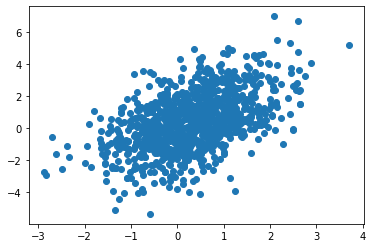

In [94]:
plt.scatter(sample[:, 0], sample[:, 1])